In [116]:
import pandas as pd
df=pd.DataFrame()

In [117]:
df=pd.read_csv('risali.csv', index_col='date',parse_dates=True)

<ipython-input-117-81c40a96e9d5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('risali.csv', index_col='date',parse_dates=True)


<Axes: xlabel='date'>

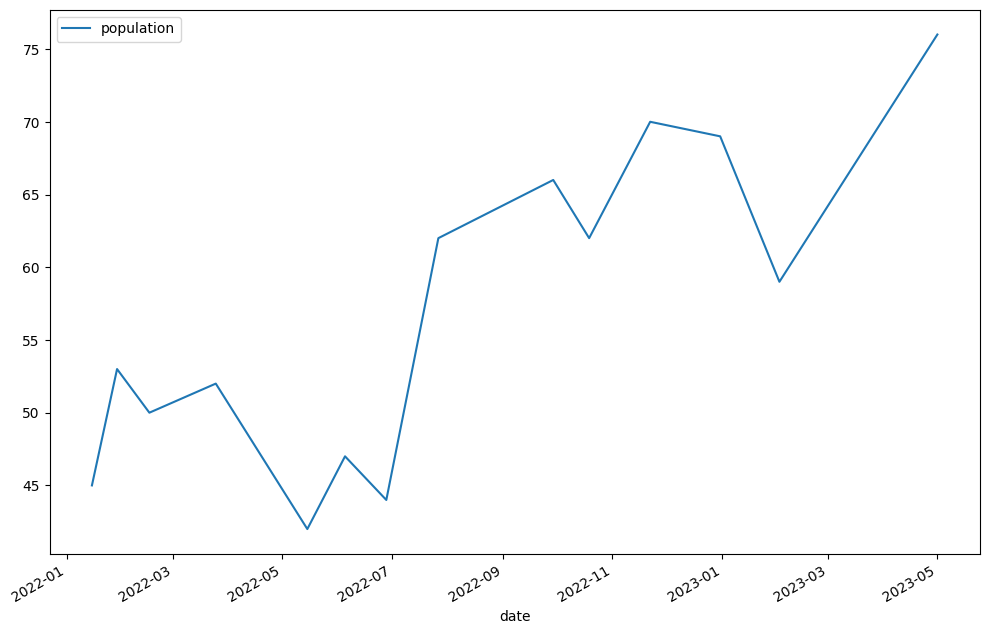

In [119]:
df.columns = ['population']
df.plot(figsize=(12,8))

In [120]:
df['population_LastMonth']=df['population'].shift(+1)
df['population_2Monthsback']=df['population'].shift(+2)
df['population_3Monthsback']=df['population'].shift(+3)
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-01-15,45,NaN,NaN,NaN
2022-01-29,53,45.0,NaN,NaN
2022-02-16,50,53.0,45.0,NaN
2022-03-25,52,50.0,53.0,45.0
2022-06-05,47,52.0,50.0,53.0
2022-05-15,42,47.0,52.0,50.0
2022-06-28,44,42.0,47.0,52.0
2022-07-27,62,44.0,42.0,47.0
2022-09-29,66,62.0,44.0,42.0


In [121]:
df=df.dropna()
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-03-25,52,50.0,53.0,45.0
2022-06-05,47,52.0,50.0,53.0
2022-05-15,42,47.0,52.0,50.0
2022-06-28,44,42.0,47.0,52.0
2022-07-27,62,44.0,42.0,47.0
2022-09-29,66,62.0,44.0,42.0
2022-10-19,62,66.0,62.0,44.0
2022-11-22,70,62.0,66.0,62.0
2022-12-31,69,70.0,62.0,66.0


In [122]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [123]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [124]:
import numpy as np
x1,x2,x3,y=df['population_LastMonth'],df['population_2Monthsback'],df['population_3Monthsback'],df['population']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[50. 53. 45.]
 [52. 50. 53.]
 [47. 52. 50.]
 [42. 47. 52.]
 [44. 42. 47.]
 [62. 44. 42.]
 [66. 62. 44.]
 [62. 66. 62.]
 [70. 62. 66.]
 [69. 70. 62.]
 [76. 69. 70.]]


In [125]:
X_train,X_test,y_train,y_test=final_x[1:14],final_x[1:14],y[1:16],y[1:16]
print(X_train.shape)
print(y_train.shape)

(10, 3)
(10, 1)


In [126]:
lin_model.fit(X_train,y_train)

LinearRegression()

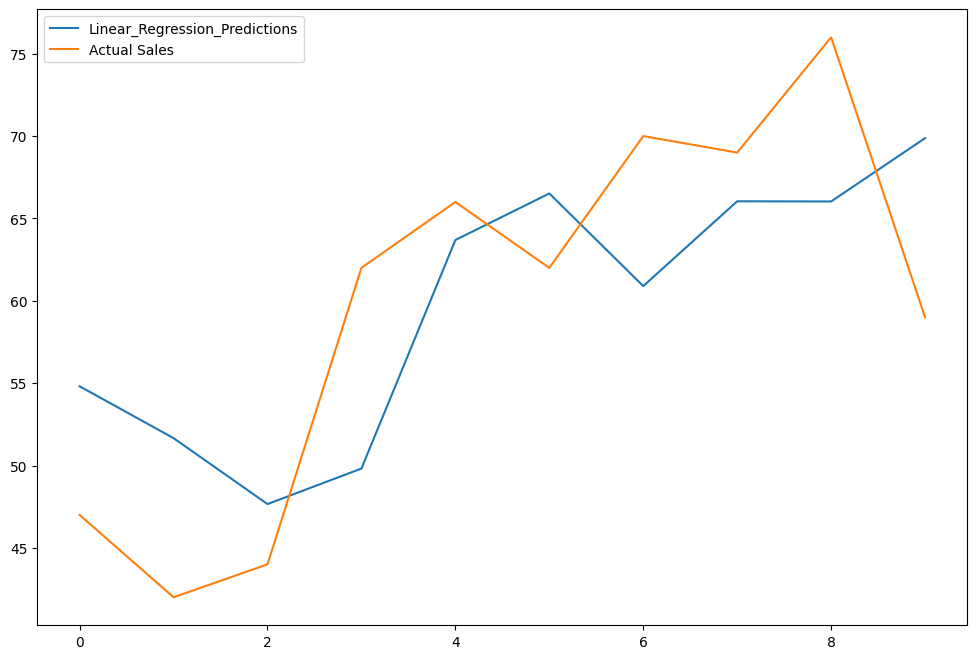

In [127]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [128]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [129]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 8.069701152831366
